In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider
provider = SaverProvider()

In [3]:
job = provider.retrieve_job("cmyk2vbrmwhg008bs57g")
counts = job.result().get_counts()

counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
print(counts)

{'000 00 00 00': 602, '000 10 00 00': 93, '000 00 10 00': 62, '000 00 00 10': 48, '000 10 10 10': 34, '000 10 10 00': 22, '000 10 00 10': 14, '100 10 00 00': 10, '100 00 00 00': 9, '100 10 00 10': 8, '000 00 01 00': 8, '000 01 00 00': 6, '100 10 10 00': 6, '000 00 00 01': 5, '100 00 10 00': 5, '001 00 00 00': 5, '001 00 01 00': 5, '001 01 00 01': 5, '100 00 00 10': 4, '100 00 10 10': 2, '000 01 01 01': 2, '000 10 00 01': 2, '001 00 01 10': 2, '001 01 00 00': 2, '010 00 00 00': 2, '010 01 00 00': 2, '010 01 10 01': 2, '000 00 10 10': 2, '010 11 00 00': 2, '100 10 10 10': 1, '100 11 00 00': 1, '000 01 01 00': 1, '101 10 00 00': 1, '000 01 01 11': 1, '110 11 00 00': 1, '000 01 11 00': 1, '000 10 01 10': 1, '000 11 00 00': 1, '000 11 11 10': 1, '000 11 11 11': 1, '001 00 00 10': 1, '001 00 10 00': 1, '001 10 10 10': 1, '001 10 11 10': 1, '001 11 00 00': 1, '001 11 01 11': 1, '010 00 10 00': 1, '010 00 11 00': 1, '000 00 10 01': 1, '010 01 10 00': 1, '010 10 00 11': 1, '010 10 01 00': 1, '0

In [4]:
from qiskit_qec.circuits import RepetitionCodeCircuit
from qiskit_qec.decoders import UnionFindDecoder

# Code params
d = 3
T = 3

code = RepetitionCodeCircuit(d, T)
decoder = UnionFindDecoder(code)

In [15]:
logical_counts = {'0':0, '1':0}

for string, shots in counts.items():
    
    #if string[:3] not in ["100", "001"]:
        #continue=

    logical, flipped_qubit_dict = decoder.process(string, _return_err_str = True, growth=1)
    if logical[0] == 1:
        #print("meas_str:", string)
        #print("flipped_qubit_dict", flipped_qubit_dict)
        pass
    #print("meas_str:", string, '\n')
    logical_counts[f"{logical[0]}"] += shots
    
logical_counts

{'0': 926, '1': 74}

Text(0, 0.5, 'nb errors / 1000 shots')

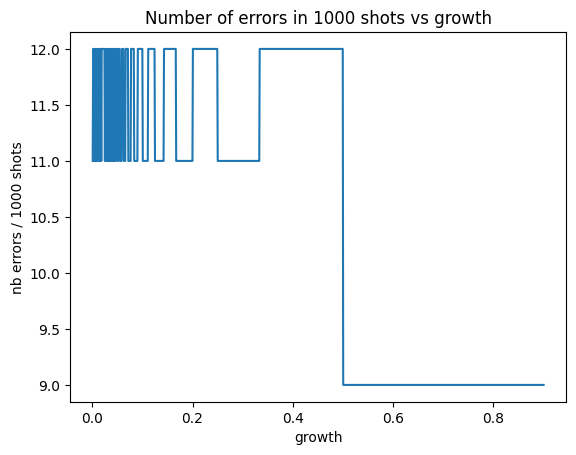

In [24]:
def nb_errors(growth):
    err = 0
    for string, shots in counts.items():
        logical, flipped_qubit_dict = decoder.process(string, _return_err_str = True, growth=growth)
        if logical[0] == 1:
            err += shots 
    return err

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.001, 0.9, 1000)
y = [nb_errors(growth) for growth in x]

plt.plot(x, y)
plt.title("Number of errors in 1000 shots vs growth")
plt.xlabel("growth")
plt.ylabel("nb errors / 1000 shots")